In [80]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import dedalus.public as d3 #wow, I just had to call it dedalus.public
# Had been writing dedalus3 and assuming there were actual errors with jupyter notebook launch
# since it always makes so many complaints
# Well now I'm just going to ignore the remaining jupyter notebook weirdness

In [144]:
df = h5py.File("scratch/checkpoints2/checkpoints2_s1.h5",'r')
df_fields = h5py.File("scratch/fields_two/fields_two_s1.h5",'r')

In [145]:
lnrho = df['tasks/lnrho'][:]

In [146]:
rho_fields = df_fields['tasks/rho'][:]

In [147]:
df['tasks'].keys()

<KeysViewHDF5 ['A', 'T', 'lnrho', 'phi', 'tau_A', 'v']>

In [148]:
rho = np.exp(lnrho)

In [149]:
rho.min()

0.008976212844957818

In [150]:
rho_fields.min()

-0.1433208152371429

In [151]:
df['scales/sim_time'][:]

array([0.        , 0.00673437, 0.02382031, 0.04090625, 0.05799219,
       0.07507813, 0.0930189 , 0.11095967, 0.12890044, 0.14684121])

In [152]:
df['scales/iteration'][:]

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [153]:
df_fields['scales/iteration'][:]

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [154]:
#with "h5py.file()" as file:
#    file.(whatever)
#    data = file['tasks/...'']
# last line in with grouping closes file

In [204]:
# Some toying around to figure out what x and xVal are, and r

r = 1
length = 10
nx = 32 #formerly 32 x 32 x 160? Current plan is 64 x 64 x 320 or 640
ny = 32
nz = 160
mesh = None
coords = d3.CartesianCoordinates('x', 'y','z')
dist = d3.Distributor(coords, dtype=np.float64, mesh = mesh)
xbasis = d3.RealFourier(coords['x'], size=nx, bounds=(-r, r))
ybasis = d3.RealFourier(coords['y'], size=ny, bounds=(-r, r))
zbasis = d3.RealFourier(coords['z'], size=nz, bounds=(0, length))
x,y,z = dist.local_grids(xbasis,ybasis,zbasis)

p = 0
radmax = 0
# print(x) # prints triple array with single list singleton lists of -1 to  0.9375, 32 elts
# print(z) # similar, 160 elts, from 0 to 9.9375
# print(xbasis)
# print([[i,0,0] for i in range(x.shape[0])]) # prints list of [0,0,0] thru to [31,0,0]
#print(x.shape[0], x.shape[1], x.shape[2]) #prints 32, 1, 1
# print(z.shape[0], z.shape[1], z.shape[2]) #prints 1, 1, 160
print(x[-1,0,0])
for i in range(x.shape[0]):
    xVal = x[i,0,0]
    for j in range(y.shape[1]):
       yVal = y[0,j,0]
       for k in range(z.shape[2]):
            zVal = z[0,0,k]
            rad = np.sqrt(xVal**2 + yVal**2)
            p = p + 1
            if p % 1000 == 0:
                print("xVal is", xVal)
                print("x is", x)
                print("[i,0,0] is", [i,0,0])
                print("yVal is", yVal)
                print("zVal is", zVal)
                print("z is", z)
                print("rad is", rad)
                print("radmax is", radmax)
            radmax = max(rad, radmax)

0.9375
xVal is -1.0
x is [[[-1.    ]]

 [[-0.9375]]

 [[-0.875 ]]

 [[-0.8125]]

 [[-0.75  ]]

 [[-0.6875]]

 [[-0.625 ]]

 [[-0.5625]]

 [[-0.5   ]]

 [[-0.4375]]

 [[-0.375 ]]

 [[-0.3125]]

 [[-0.25  ]]

 [[-0.1875]]

 [[-0.125 ]]

 [[-0.0625]]

 [[ 0.    ]]

 [[ 0.0625]]

 [[ 0.125 ]]

 [[ 0.1875]]

 [[ 0.25  ]]

 [[ 0.3125]]

 [[ 0.375 ]]

 [[ 0.4375]]

 [[ 0.5   ]]

 [[ 0.5625]]

 [[ 0.625 ]]

 [[ 0.6875]]

 [[ 0.75  ]]

 [[ 0.8125]]

 [[ 0.875 ]]

 [[ 0.9375]]]
[i,0,0] is [0, 0, 0]
yVal is -0.625
zVal is 2.4375
z is [[[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
   0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.0625 1.125  1.1875
   1.25   1.3125 1.375  1.4375 1.5    1.5625 1.625  1.6875 1.75   1.8125
   1.875  1.9375 2.     2.0625 2.125  2.1875 2.25   2.3125 2.375  2.4375
   2.5    2.5625 2.625  2.6875 2.75   2.8125 2.875  2.9375 3.     3.0625
   3.125  3.1875 3.25   3.3125 3.375  3.4375 3.5    3.5625 3.625  3.6875
   3.75   3.8125 3.875  3.9375 4.

x is [[[-1.    ]]

 [[-0.9375]]

 [[-0.875 ]]

 [[-0.8125]]

 [[-0.75  ]]

 [[-0.6875]]

 [[-0.625 ]]

 [[-0.5625]]

 [[-0.5   ]]

 [[-0.4375]]

 [[-0.375 ]]

 [[-0.3125]]

 [[-0.25  ]]

 [[-0.1875]]

 [[-0.125 ]]

 [[-0.0625]]

 [[ 0.    ]]

 [[ 0.0625]]

 [[ 0.125 ]]

 [[ 0.1875]]

 [[ 0.25  ]]

 [[ 0.3125]]

 [[ 0.375 ]]

 [[ 0.4375]]

 [[ 0.5   ]]

 [[ 0.5625]]

 [[ 0.625 ]]

 [[ 0.6875]]

 [[ 0.75  ]]

 [[ 0.8125]]

 [[ 0.875 ]]

 [[ 0.9375]]]
[i,0,0] is [13, 0, 0]
yVal is -0.875
zVal is 7.437499999999999
z is [[[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
   0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.0625 1.125  1.1875
   1.25   1.3125 1.375  1.4375 1.5    1.5625 1.625  1.6875 1.75   1.8125
   1.875  1.9375 2.     2.0625 2.125  2.1875 2.25   2.3125 2.375  2.4375
   2.5    2.5625 2.625  2.6875 2.75   2.8125 2.875  2.9375 3.     3.0625
   3.125  3.1875 3.25   3.3125 3.375  3.4375 3.5    3.5625 3.625  3.6875
   3.75   3.8125 3.875  3.9375 4.     4.0

xVal is 0.4375
x is [[[-1.    ]]

 [[-0.9375]]

 [[-0.875 ]]

 [[-0.8125]]

 [[-0.75  ]]

 [[-0.6875]]

 [[-0.625 ]]

 [[-0.5625]]

 [[-0.5   ]]

 [[-0.4375]]

 [[-0.375 ]]

 [[-0.3125]]

 [[-0.25  ]]

 [[-0.1875]]

 [[-0.125 ]]

 [[-0.0625]]

 [[ 0.    ]]

 [[ 0.0625]]

 [[ 0.125 ]]

 [[ 0.1875]]

 [[ 0.25  ]]

 [[ 0.3125]]

 [[ 0.375 ]]

 [[ 0.4375]]

 [[ 0.5   ]]

 [[ 0.5625]]

 [[ 0.625 ]]

 [[ 0.6875]]

 [[ 0.75  ]]

 [[ 0.8125]]

 [[ 0.875 ]]

 [[ 0.9375]]]
[i,0,0] is [23, 0, 0]
yVal is 0.25
zVal is 2.4375
z is [[[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
   0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.0625 1.125  1.1875
   1.25   1.3125 1.375  1.4375 1.5    1.5625 1.625  1.6875 1.75   1.8125
   1.875  1.9375 2.     2.0625 2.125  2.1875 2.25   2.3125 2.375  2.4375
   2.5    2.5625 2.625  2.6875 2.75   2.8125 2.875  2.9375 3.     3.0625
   3.125  3.1875 3.25   3.3125 3.375  3.4375 3.5    3.5625 3.625  3.6875
   3.75   3.8125 3.875  3.9375 4.     4

In [160]:
Density = df['tasks/lnrho'][9,:,:,:]

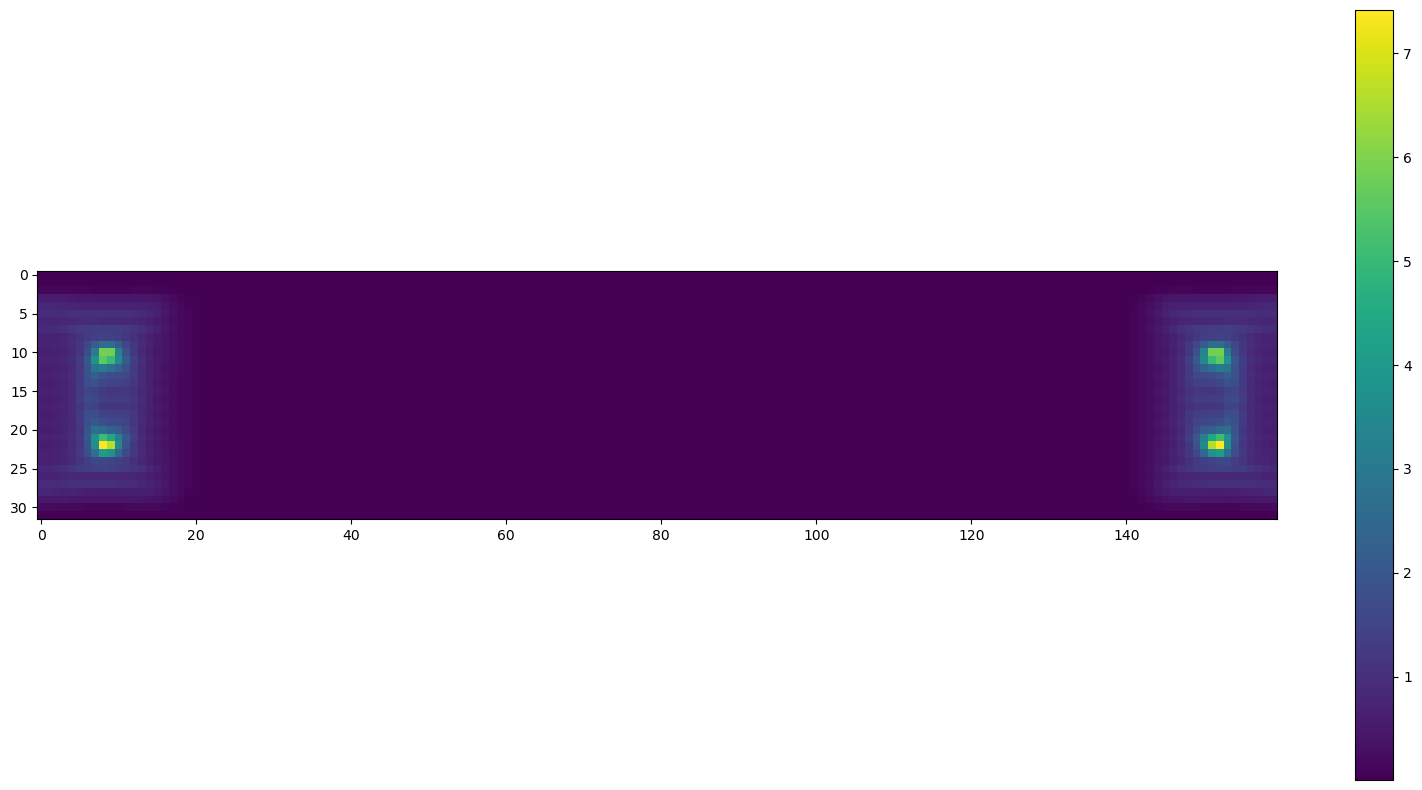

In [161]:
plt.figure(figsize=(20,10)) #make larger
plt.imshow(np.exp(Density[:,7,:])) #vmax = 0.01
plt.colorbar()

In [162]:
Temp = df['tasks/T'][1,:,:,:]

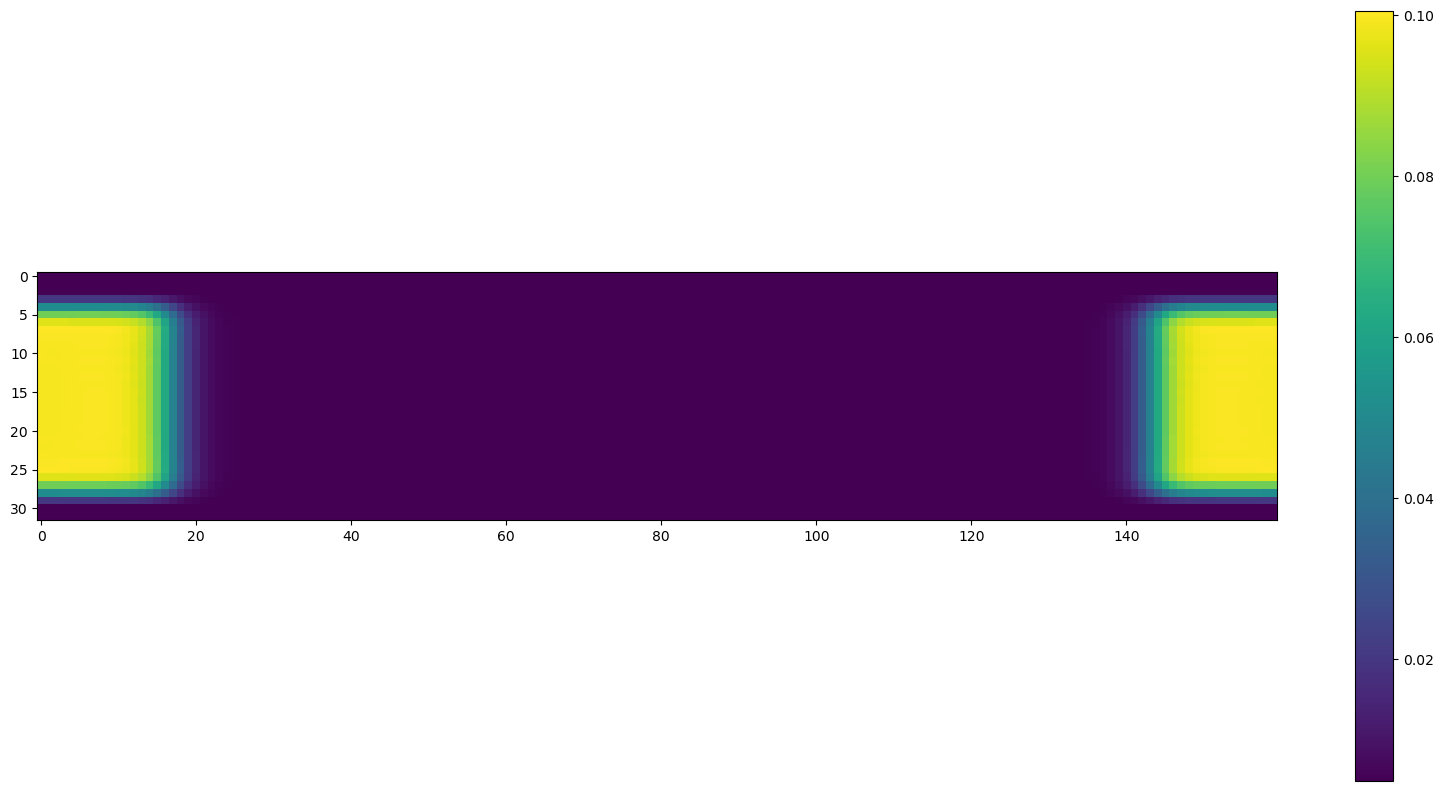

In [167]:
plt.figure(figsize=(20,10)) #make larger
plt.imshow(Temp[:,5,:]) #vmax = 0.01
plt.colorbar()

In [133]:
np.exp(Density).min()

0.007560405778082576

In [134]:
np.exp(Density).argmin() #turn this into 3D index - unravel, then slice in one of those directions to see plane where min is

33280

In [135]:
T_fields = df_fields['tasks/T'][:]
T_fields.min()

-0.013394393850158778

In [136]:
T = df['tasks/T'][:]
T.min()

-0.028116624073539598

In [137]:
rho_fields.min()

-0.7194252063844384

In [138]:
df.close()
df_fields.close()